# Preprocessing and Modeling

Ear Images Reference:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232776

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception, InceptionResNetV2, ResNet101
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### DateFrame to Input Results From Models

In [2]:
results_df2 = pd.read_csv('../data/results_df2.csv', index_col = False)

In [3]:
results_df2.head()

,Model,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
0,baseline,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,model_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,model_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,model_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,model_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
results_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            21 non-null     object 
 1   train_accuracy   17 non-null     float64
 2   val_accuracy     17 non-null     float64
 3   test_accuracy    17 non-null     float64
 4   train_precision  17 non-null     float64
 5   val_precision    17 non-null     float64
 6   test_precision   17 non-null     float64
 7   train_recall     17 non-null     float64
 8   val_recall       17 non-null     float64
 9   test_recall      17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.8+ KB


In [5]:
results_df2['train_accuracy'] = pd.to_numeric(results_df2['train_accuracy'])
results_df2['val_accuracy'] = pd.to_numeric(results_df2['val_accuracy'])
results_df2['test_accuracy'] = pd.to_numeric(results_df2['test_accuracy'])
results_df2['train_precision'] = pd.to_numeric(results_df2['train_precision'])
results_df2['val_precision'] = pd.to_numeric(results_df2['val_precision'])
results_df2['test_precision'] = pd.to_numeric(results_df2['test_precision'])
results_df2['train_recall'] = pd.to_numeric(results_df2['train_recall'])
results_df2['val_recall'] = pd.to_numeric(results_df2['val_recall'])
results_df2['test_recall'] = pd.to_numeric(results_df2['test_recall'])

In [6]:
results_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            21 non-null     object 
 1   train_accuracy   17 non-null     float64
 2   val_accuracy     17 non-null     float64
 3   test_accuracy    17 non-null     float64
 4   train_precision  17 non-null     float64
 5   val_precision    17 non-null     float64
 6   test_precision   17 non-null     float64
 7   train_recall     17 non-null     float64
 8   val_recall       17 non-null     float64
 9   test_recall      17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.8+ KB


## Import Data 

In [7]:
train_gen = ImageDataGenerator(rescale = 1/255.)

train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/')

Found 312 images belonging to 4 classes.


In [416]:
test_gen = ImageDataGenerator(rescale = 1/255.)

test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', shuffle = False)

Found 76 images belonging to 4 classes.


## Basic Model

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(150, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [10]:
history = model.fit(train_data, epochs = 30, validation_data = test_data,
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 6s 524ms/step - loss: 90.0312 - accuracy: 0.3141 - recall: 0.2853 - precision: 0.3080 - val_loss: 55.1820 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 2/30
10/10 [==============================] - 5s 550ms/step - loss: 28.8455 - accuracy: 0.3814 - recall: 0.3814 - precision: 0.3814 - val_loss: 20.2920 - val_accuracy: 0.2632 - val_recall: 0.2632 - val_precision: 0.2632
Epoch 3/30
10/10 [==============================] - 5s 561ms/step - loss: 12.7091 - accuracy: 0.4936 - recall: 0.4936 - precision: 0.4936 - val_loss: 8.5104 - val_accuracy: 0.4737 - val_recall: 0.4737 - val_precision: 0.4737
Epoch 4/30
10/10 [==============================] - 5s 537ms/step - loss: 7.7495 - accuracy: 0.5833 - recall: 0.5833 - precision: 0.5833 - val_loss: 8.2116 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 5/30
10/10 [==============================] - 5s 507ms/step - loss: 5.5463 - accuracy: 0.5577

#### Adding Results to DF

In [229]:
results_df2['train_accuracy'].iloc[0] = 0.8846

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [230]:
results_df2['val_accuracy'].iloc[0] = 0.5526

In [231]:
results_df2['train_precision'].iloc[0] =0.9013

In [232]:
results_df2['val_precision'].iloc[0] =  0.5467

In [233]:
results_df2['train_recall'].iloc[0] = 0.8782

In [234]:
results_df2['val_recall'].iloc[0] = 0.5395 

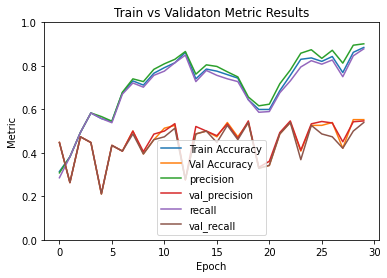

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validaton Metric Results');

Model is overfit model

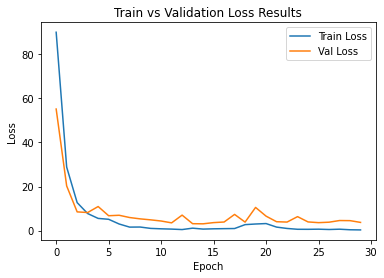

In [18]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [19]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [439]:
model.evaluate(test_data)

preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds)


3/3 [==============================] - 1s 231ms/step - loss: 3.7345 - accuracy: 0.5526 - recall: 0.5395 - precision: 0.5467


#### Adding Results to DF

In [235]:
results_df2['test_recall'].iloc[0] = 0.5395

In [236]:
results_df2['test_accuracy'].iloc[0] = 0.5526

In [237]:
results_df2['test_precision'].iloc[0] = 0.5467

#### Confusion Matrix

In [440]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       5             1     1
normal               0      23             1    10
otitis_media         0       5             5     6
tube                 0       4             1    14


#### Classification Report 

In [441]:
print(classification_report(test_data_values, preds, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.62      0.68      0.65        34
otitis_media       0.62      0.31      0.42        16
        tube       0.45      0.74      0.56        19

    accuracy                           0.55        76
   macro avg       0.42      0.43      0.41        76
weighted avg       0.52      0.55      0.52        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 1: Adding Epochs and Changing Density 

In [26]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(4, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [27]:
history1 = model1.fit(train_data, epochs = 100, validation_data = test_data,
    batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 487ms/step - loss: 80.1258 - accuracy: 0.3558 - recall: 0.3205 - precision: 0.3521 - val_loss: 33.0448 - val_accuracy: 0.0921 - val_recall: 0.0921 - val_precision: 0.0921
Epoch 2/100
10/10 [==============================] - 5s 489ms/step - loss: 14.6660 - accuracy: 0.3622 - recall: 0.3622 - precision: 0.3657 - val_loss: 14.9027 - val_accuracy: 0.3158 - val_recall: 0.3158 - val_precision: 0.3158
Epoch 3/100
10/10 [==============================] - 5s 484ms/step - loss: 10.2364 - accuracy: 0.4744 - recall: 0.4744 - precision: 0.4759 - val_loss: 5.1838 - val_accuracy: 0.4605 - val_recall: 0.4605 - val_precision: 0.4605
Epoch 4/100
10/10 [==============================] - 4s 453ms/step - loss: 3.0356 - accuracy: 0.5769 - recall: 0.5705 - precision: 0.5779 - val_loss: 5.8536 - val_accuracy: 0.3816 - val_recall: 0.3816 - val_precision: 0.3816
Epoch 5/100
10/10 [==============================] - 5s 454ms/step - loss: 1.9369 - accuracy: 0

#### Adding Results to DF

In [238]:
results_df2['train_accuracy'].iloc[1] = 1.0000

In [239]:
results_df2['val_accuracy'].iloc[1] =  0.6053

In [240]:
results_df2['train_recall'].iloc[1] = 1.0000

In [241]:
results_df2['val_recall'].iloc[1] = 0.6053

In [242]:
results_df2['train_precision'].iloc[1] = 1.0000

In [243]:
results_df2['val_precision'].iloc[1] = 0.6053

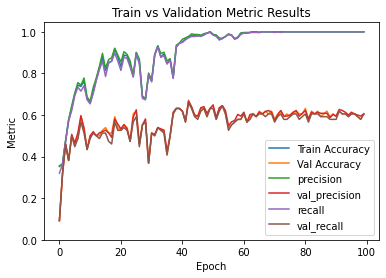

In [34]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['val_precision'], label = 'val_precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.plot(history1.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

model still over fit 

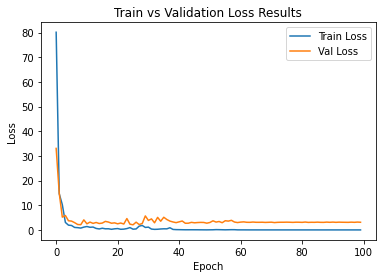

In [35]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [36]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [436]:
model1.evaluate(test_data)

preds1 = model1.predict(test_data)
preds1 = np.argmax(preds1, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds1)

3/3 [==============================] - 1s 224ms/step - loss: 3.1118 - accuracy: 0.6053 - recall: 0.6053 - precision: 0.6053


#### Adding Test Data to DF

In [246]:
results_df2['test_accuracy'].iloc[1] = 0.6053

In [245]:
results_df2['test_recall'].iloc[1] =0.6053

In [244]:
results_df2['test_precision'].iloc[1] = 0.6053 

#### Confusion Matrix

In [437]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       5             0     0
normal               0      20             5     9
otitis_media         0       2             7     7
tube                 0       1             1    17


#### Classifcation Report 

In [438]:
print(classification_report(test_data_values, preds1, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       1.00      0.29      0.44         7
      normal       0.71      0.59      0.65        34
otitis_media       0.54      0.44      0.48        16
        tube       0.52      0.89      0.65        19

    accuracy                           0.61        76
   macro avg       0.69      0.55      0.56        76
weighted avg       0.65      0.61      0.59        76



## Model 2: Adding Layers 

In [43]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [44]:
history2 = model2.fit(train_data, epochs = 60, validation_data = test_data,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 6s 558ms/step - loss: 25.3422 - accuracy: 0.2917 - recall: 0.2564 - precision: 0.2952 - val_loss: 6.6906 - val_accuracy: 0.2237 - val_recall: 0.2237 - val_precision: 0.2237
Epoch 2/60
10/10 [==============================] - 5s 490ms/step - loss: 4.4886 - accuracy: 0.3942 - recall: 0.3814 - precision: 0.3993 - val_loss: 4.3053 - val_accuracy: 0.1974 - val_recall: 0.1447 - val_precision: 0.1692
Epoch 3/60
10/10 [==============================] - 5s 479ms/step - loss: 4.5676 - accuracy: 0.3397 - recall: 0.3301 - precision: 0.3411 - val_loss: 2.9833 - val_accuracy: 0.4605 - val_recall: 0.4605 - val_precision: 0.4667
Epoch 4/60
10/10 [==============================] - 5s 464ms/step - loss: 3.9519 - accuracy: 0.5288 - recall: 0.5000 - precision: 0.5361 - val_loss: 2.8206 - val_accuracy: 0.4342 - val_recall: 0.4342 - val_precision: 0.4583
Epoch 5/60
10/10 [==============================] - 4s 457ms/step - loss: 1.7525 - accuracy: 0.6506 - r

#### Adding Results to DF

In [247]:
results_df2['train_accuracy'].iloc[2] = 0.9936 

In [248]:
results_df2['train_recall'].iloc[2] = 0.9904

In [249]:
results_df2['train_precision'].iloc[2] = 1

In [250]:
results_df2['val_accuracy'].iloc[2] = 0.5658

In [251]:
results_df2['val_recall'].iloc[2] = 0.5395

In [252]:
results_df2['val_precision'].iloc[2] = 0.5616

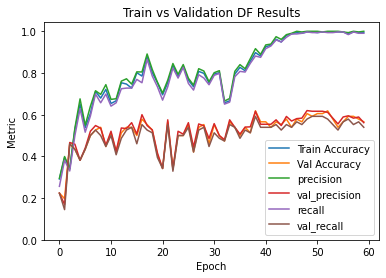

In [51]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['val_precision'], label = 'val_precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.plot(history2.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation DF Results');

model still over fit 

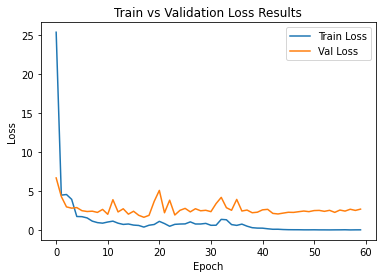

In [52]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [53]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [434]:
model2.evaluate(test_data)

preds2 = model2.predict(test_data)
preds2 = np.argmax(preds2, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds2)

3/3 [==============================] - 1s 241ms/step - loss: 2.6952 - accuracy: 0.5658 - recall: 0.5395 - precision: 0.5616


#### Adding Results to DF

In [255]:
results_df2['test_accuracy'].iloc[2] =  0.5658

In [254]:
results_df2['test_precision'].iloc[2] =  0.5616

In [253]:
results_df2['test_recall'].iloc[2] =   0.5395

#### Confusion Matrix

In [435]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       5             0     0
normal               1      17             6    10
otitis_media         0       2             7     7
tube                 0       1             1    17


#### Classification Report 

In [59]:
print(classification_report(test_data_values, preds2, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.17      0.14      0.15         7
      normal       0.46      0.32      0.38        34
otitis_media       0.33      0.25      0.29        16
        tube       0.29      0.53      0.38        19

    accuracy                           0.34        76
   macro avg       0.31      0.31      0.30        76
weighted avg       0.36      0.34      0.34        76



## Model 3: Changing Layers and Using Early Stopping 

In [60]:
early_stop = EarlyStopping(monitor = 'val_recall', patience = 5)

In [61]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(4, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [62]:
history3 = model3.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
10/10 [==============================] - 6s 579ms/step - loss: 32.4316 - accuracy: 0.3301 - recall: 0.3205 - precision: 0.3534 - val_loss: 9.1425 - val_accuracy: 0.3026 - val_recall: 0.3026 - val_precision: 0.3026
Epoch 2/80
10/10 [==============================] - 5s 484ms/step - loss: 6.9390 - accuracy: 0.4295 - recall: 0.4295 - precision: 0.4295 - val_loss: 6.4125 - val_accuracy: 0.3158 - val_recall: 0.2895 - val_precision: 0.3099
Epoch 3/80
10/10 [==============================] - 4s 451ms/step - loss: 4.7281 - accuracy: 0.5705 - recall: 0.5641 - precision: 0.5696 - val_loss: 9.1775 - val_accuracy: 0.3026 - val_recall: 0.3026 - val_precision: 0.3026
Epoch 4/80
10/10 [==============================] - 4s 452ms/step - loss: 2.8962 - accuracy: 0.6282 - recall: 0.6250 - precision: 0.6331 - val_loss: 3.7668 - val_accuracy: 0.5658 - val_recall: 0.5658 - val_precision: 0.5658
Epoch 5/80
10/10 [==============================] - 5s 510ms/step - loss: 1.9325 - accuracy: 0.6923 - r

#### Adding Results to DF

In [256]:
results_df2['train_accuracy'].iloc[3] =  0.5801

In [257]:
results_df2['train_recall'].iloc[3] = 0.5801

In [258]:
results_df2['train_precision'].iloc[3] = 0.5820

In [259]:
results_df2['val_accuracy'].iloc[3] = 0.4737

In [260]:
results_df2['val_recall'].iloc[3] = 0.4737

In [261]:
results_df2['val_precision'].iloc[3] = 0.4800

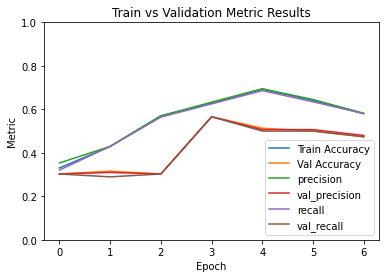

In [69]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['val_precision'], label = 'val_precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.plot(history3.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


model still overfit

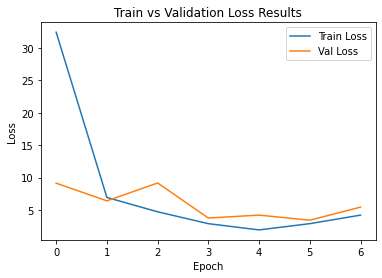

In [70]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [71]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [431]:
model3.evaluate(test_data)

preds3 = model3.predict(test_data)
preds3 = np.argmax(preds3, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds3)

3/3 [==============================] - 1s 223ms/step - loss: 5.4503 - accuracy: 0.4737 - recall: 0.4737 - precision: 0.4800


#### Adding Results to DF

In [262]:
results_df2['test_precision'].iloc[3] =  0.4800

In [263]:
results_df2['test_recall'].iloc[3] = 0.4737

In [264]:
results_df2['test_accuracy'].iloc[3] = 0.4737

#### Confusion Matrix

In [432]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             7       0             0     0
normal              12       4            16     2
otitis_media         0       1            11     4
tube                 1       3             1    14


#### Classification Report 

In [433]:
print(classification_report(test_data_values, preds3, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#precision:TP/(TP+FP)
#recall:TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.35      1.00      0.52         7
      normal       0.50      0.12      0.19        34
otitis_media       0.39      0.69      0.50        16
        tube       0.70      0.74      0.72        19

    accuracy                           0.47        76
   macro avg       0.49      0.64      0.48        76
weighted avg       0.51      0.47      0.42        76



## Model 4: Changing Layers and Dropout

In [78]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dense(4, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [79]:
history4 = model4.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 530ms/step - loss: 35.6876 - accuracy: 0.3590 - recall: 0.3301 - precision: 0.3679 - val_loss: 13.4473 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_precision: 0.2500
Epoch 2/80
10/10 [==============================] - 5s 493ms/step - loss: 17.6590 - accuracy: 0.3365 - recall: 0.3365 - precision: 0.3365 - val_loss: 7.2910 - val_accuracy: 0.3947 - val_recall: 0.3947 - val_precision: 0.3947
Epoch 3/80
10/10 [==============================] - 5s 507ms/step - loss: 9.7781 - accuracy: 0.3686 - recall: 0.3654 - precision: 0.3689 - val_loss: 2.9860 - val_accuracy: 0.5132 - val_recall: 0.5000 - val_precision: 0.5205
Epoch 4/80
10/10 [==============================] - 5s 503ms/step - loss: 5.4090 - accuracy: 0.4167 - recall: 0.4103 - precision: 0.4197 - val_loss: 2.4617 - val_accuracy: 0.5526 - val_recall: 0.5526 - val_precision: 0.5600
Epoch 5/80
10/10 [==============================] - 5s 498ms/step - loss: 3.0580 - accuracy: 0.5224 -

#### Adding Results to DF

In [265]:
results_df2['train_accuracy'].iloc[4] =  0.6603

In [266]:
results_df2['train_recall'].iloc[4] = 0.5385 

In [267]:
results_df2['train_precision'].iloc[4] = 0.7706

In [268]:
results_df2['val_accuracy'].iloc[4] = 0.5658

In [269]:
results_df2['val_recall'].iloc[4] = 0.5000

In [270]:
results_df2['val_precision'].iloc[4] = 0.6129

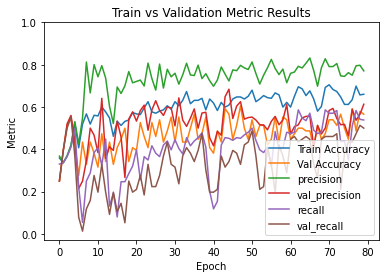

In [86]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history4.history['precision'], label = 'precision')
plt.plot(history4.history['val_precision'], label = 'val_precision')
plt.plot(history4.history['recall'], label = 'recall')
plt.plot(history4.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');



model not learning that much per epoch, possibly too much regularization 

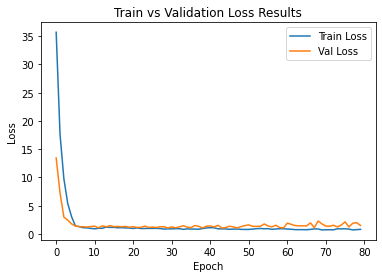

In [87]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [88]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [428]:
model4.evaluate(test_data)

preds4 = model4.predict(test_data)
preds4 = np.argmax(preds4, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds4)

3/3 [==============================] - 1s 240ms/step - loss: 1.4986 - accuracy: 0.5658 - recall: 0.5000 - precision: 0.6129


#### Adding Results to DF

In [273]:
results_df2['test_accuracy'].iloc[4] = 0.5658

In [272]:
results_df2['test_recall'].iloc[4] = 0.5000

In [271]:
results_df2['test_precision'].iloc[4] = 0.6129

#### Confusion Matrix 

In [429]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       7             0     0
normal               0      23             7     4
otitis_media         0       4             4     8
tube                 0       3             0    16


#### Classification Report 

In [430]:
print(classification_report(test_data_values, preds4, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.62      0.68      0.65        34
otitis_media       0.36      0.25      0.30        16
        tube       0.57      0.84      0.68        19

    accuracy                           0.57        76
   macro avg       0.39      0.44      0.41        76
weighted avg       0.50      0.57      0.52        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 5: Kernal Regularizer with Dropout

In [95]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(4, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [96]:
history5 = model5.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 528ms/step - loss: 26.4919 - accuracy: 0.2885 - recall: 0.2821 - precision: 0.3045 - val_loss: 13.2634 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 2/80
10/10 [==============================] - 5s 489ms/step - loss: 15.6732 - accuracy: 0.4038 - recall: 0.4038 - precision: 0.4038 - val_loss: 14.1348 - val_accuracy: 0.1974 - val_recall: 0.1974 - val_precision: 0.1974
Epoch 3/80
10/10 [==============================] - 5s 499ms/step - loss: 10.7592 - accuracy: 0.4006 - recall: 0.4006 - precision: 0.4006 - val_loss: 4.3019 - val_accuracy: 0.4868 - val_recall: 0.4868 - val_precision: 0.4868
Epoch 4/80
10/10 [==============================] - 5s 489ms/step - loss: 3.6584 - accuracy: 0.5064 - recall: 0.5000 - precision: 0.5166 - val_loss: 2.3128 - val_accuracy: 0.5263 - val_recall: 0.5000 - val_precision: 0.5507
Epoch 5/80
10/10 [==============================] - 5s 497ms/step - loss: 2.3589 - accuracy: 0.4615

#### Adding Results to DF

In [279]:
results_df2['train_accuracy'].iloc[5] = 0.6186

In [278]:
results_df2['train_recall'].iloc[5] = 0.4231

In [277]:
results_df2['train_precision'].iloc[5] = 0.7543

In [276]:
results_df2['val_accuracy'].iloc[5] = 0.3816

In [275]:
results_df2['val_recall'].iloc[5] = 0.2632 

In [274]:
results_df2['val_precision'].iloc[5] = 0.4878

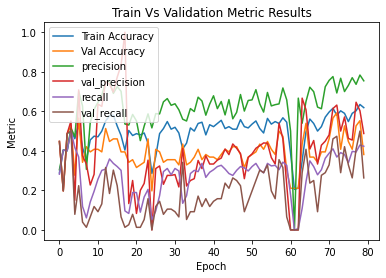

In [103]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history5.history['precision'], label = 'precision')
plt.plot(history5.history['val_precision'], label = 'val_precision')
plt.plot(history5.history['recall'], label = 'recall')
plt.plot(history5.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train Vs Validation Metric Results');

slow learning process not much information gained from each epoch

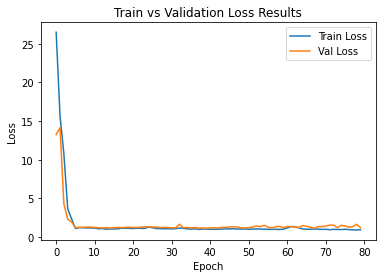

In [104]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [105]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [425]:
model5.evaluate(test_data)

preds5 = model5.predict(test_data)
preds5 = np.argmax(preds5, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds5)

3/3 [==============================] - 1s 250ms/step - loss: 1.2241 - accuracy: 0.3816 - recall: 0.2632 - precision: 0.4878


#### Adding Results to DF

In [282]:
results_df2['test_accuracy'].iloc[5] = 0.3816

In [281]:
results_df2['test_recall'].iloc[5] = 0.2632

In [280]:
results_df2['test_precision'].iloc[5]  =  0.4878

#### Confusion Matrix

In [426]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       2             5     0
normal               0      17            17     0
otitis_media         0       8             8     0
tube                 0      13             2     4


#### Classification Report 

In [427]:
print(classification_report(test_data_values, preds5, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.42      0.50      0.46        34
otitis_media       0.25      0.50      0.33        16
        tube       1.00      0.21      0.35        19

    accuracy                           0.38        76
   macro avg       0.42      0.30      0.29        76
weighted avg       0.49      0.38      0.36        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 6: Adding Convolutional Operation

In [284]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.2))
model6.add(Dense(4, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


In [285]:
history6 = model6.fit(train_data, epochs = 40, validation_data = test_data,
    batch_size = 32)

Epoch 1/40
10/10 [==============================] - 9s 811ms/step - loss: 48.8288 - accuracy: 0.3558 - recall: 0.3333 - precision: 0.3714 - val_loss: 24.8998 - val_accuracy: 0.3684 - val_recall: 0.3684 - val_precision: 0.3684
Epoch 2/40
10/10 [==============================] - 7s 760ms/step - loss: 16.6031 - accuracy: 0.4327 - recall: 0.4327 - precision: 0.4341 - val_loss: 4.4870 - val_accuracy: 0.5789 - val_recall: 0.5789 - val_precision: 0.5867
Epoch 3/40
10/10 [==============================] - 8s 763ms/step - loss: 2.0294 - accuracy: 0.5577 - recall: 0.4423 - precision: 0.6216 - val_loss: 1.1750 - val_accuracy: 0.5658 - val_recall: 0.0658 - val_precision: 0.5556
Epoch 4/40
10/10 [==============================] - 8s 792ms/step - loss: 1.1278 - accuracy: 0.5224 - recall: 0.2404 - precision: 0.7576 - val_loss: 1.1518 - val_accuracy: 0.5132 - val_recall: 0.1974 - val_precision: 0.7500
Epoch 5/40
10/10 [==============================] - 8s 791ms/step - loss: 1.0126 - accuracy: 0.6186 -

#### Adding Results to DF

In [287]:
results_df2['train_accuracy'].iloc[6] =0.8205

results_df2['train_precision'].iloc[6] =  0.9593

results_df2['train_recall'].iloc[6] = 0.7564

results_df2['val_accuracy'].iloc[6] = 0.6053

results_df2['val_precision'].iloc[6] =  0.6338

results_df2['val_recall'].iloc[6] = 0.5921

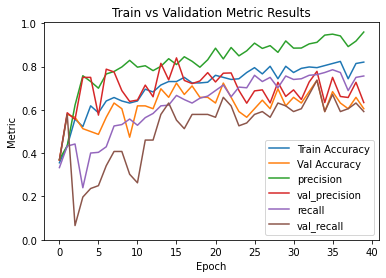

In [286]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history6.history['precision'], label = 'precision')
plt.plot(history6.history['val_precision'], label = 'val_precision')
plt.plot(history6.history['recall'], label = 'recall')
plt.plot(history6.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

not learning much more information after 15 epochs

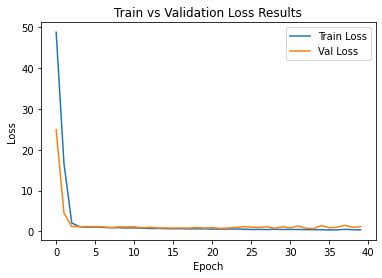

In [288]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [117]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [421]:
model6.evaluate(test_data)

preds6 = model6.predict(test_data)
preds6 = np.argmax(preds6, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds6)

3/3 [==============================] - 1s 298ms/step - loss: 1.1460 - accuracy: 0.6053 - recall: 0.5921 - precision: 0.6338


#### Adding Results to DF

In [290]:
results_df2['test_accuracy'].iloc[6] =0.6053

results_df2['test_precision'].iloc[6] = 0.6338

results_df2['test_recall'].iloc[6] = 0.5921

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [422]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       5             1     1
normal               0      20             7     7
otitis_media         0       0            10     6
tube                 0       0             3    16


#### Classification Report 

In [424]:
print(classification_report(test_data_values, preds6, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.80      0.59      0.68        34
otitis_media       0.48      0.62      0.54        16
        tube       0.53      0.84      0.65        19

    accuracy                           0.61        76
   macro avg       0.45      0.51      0.47        76
weighted avg       0.59      0.61      0.58        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 7: Convolutional Operation and Max Pooling

In [122]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.2))
model7.add(Dense(4, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [123]:
history7 = model7.fit(train_data, epochs = 60, validation_data = test_data,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 7s 633ms/step - loss: 17.4665 - accuracy: 0.3494 - recall: 0.3365 - precision: 0.3737 - val_loss: 4.1144 - val_accuracy: 0.3158 - val_recall: 0.3026 - val_precision: 0.3151
Epoch 2/60
10/10 [==============================] - 6s 621ms/step - loss: 3.9504 - accuracy: 0.4904 - recall: 0.4872 - precision: 0.5050 - val_loss: 2.5733 - val_accuracy: 0.4737 - val_recall: 0.3816 - val_precision: 0.4531
Epoch 3/60
10/10 [==============================] - 6s 628ms/step - loss: 1.7070 - accuracy: 0.5353 - recall: 0.4551 - precision: 0.5525 - val_loss: 1.6104 - val_accuracy: 0.3816 - val_recall: 0.2763 - val_precision: 0.3962
Epoch 4/60
10/10 [==============================] - 6s 583ms/step - loss: 0.9099 - accuracy: 0.6731 - recall: 0.5353 - precision: 0.7557 - val_loss: 0.9664 - val_accuracy: 0.5921 - val_recall: 0.4079 - val_precision: 0.7561
Epoch 5/60
10/10 [==============================] - 6s 545ms/step - loss: 0.7434 - accuracy: 0.7436 - r

#### Adding Results to DF

In [293]:
results_df2['train_accuracy'].iloc[7] = 0.9872

results_df2['train_precision'].iloc[7] = 0.9871

results_df2['train_recall'].iloc[7] = 0.9840

results_df2['val_accuracy'].iloc[7] = 0.7500

results_df2['val_precision'].iloc[7] =  0.7703

results_df2['val_recall'].iloc[7] = 0.7500

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


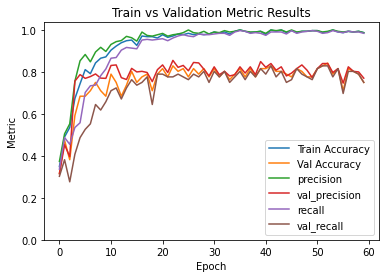

In [125]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history7.history['precision'], label = 'precision')
plt.plot(history7.history['val_precision'], label = 'val_precision')
plt.plot(history7.history['recall'], label = 'recall')
plt.plot(history7.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

model overfit, validation metrics improving 

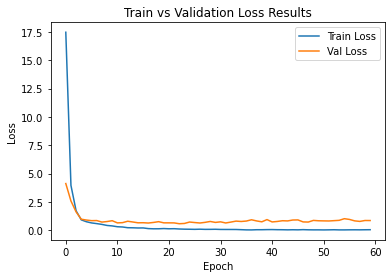

In [126]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [127]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [418]:
model7.evaluate(test_data)

preds7 = model7.predict(test_data)
preds7 = np.argmax(preds7, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds7)

3/3 [==============================] - 1s 263ms/step - loss: 0.8501 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.7703


#### Adding Results to DF

In [294]:
results_df2['test_accuracy'].iloc[7] = 0.7500

results_df2['test_precision'].iloc[7] = 0.7703

results_df2['test_recall'].iloc[7] = 0.7500

#### Confusion Matrix

In [419]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion','normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             3       2             2     0
normal               0      29             2     3
otitis_media         0       1            10     5
tube                 2       1             1    15


#### Classification Report 

In [420]:
print(classification_report(test_data_values, preds7, target_names = [ 'effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.60      0.43      0.50         7
      normal       0.88      0.85      0.87        34
otitis_media       0.67      0.62      0.65        16
        tube       0.65      0.79      0.71        19

    accuracy                           0.75        76
   macro avg       0.70      0.67      0.68        76
weighted avg       0.75      0.75      0.75        76



## Model 8: Adding Prebuilt Networks InceptionV3

In [132]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [133]:
test_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [372]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/')


Found 312 images belonging to 4 classes.


In [371]:
test_data_aug = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', shuffle = False)

Found 76 images belonging to 4 classes.


In [136]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [137]:
preds = conv_base.predict(train_aug)

In [138]:
preds_test = conv_base.predict(test_data_aug)

In [139]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.2))
model8.add(Dense(4, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [140]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [141]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_test, y_test_binarized),
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 1s 62ms/step - loss: 20.0772 - accuracy: 0.2949 - recall: 0.2692 - precision: 0.2917 - val_loss: 7.6217 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 2/30
10/10 [==============================] - 0s 34ms/step - loss: 1.9552 - accuracy: 0.3974 - recall: 0.2885 - precision: 0.4433 - val_loss: 1.3562 - val_accuracy: 0.1842 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 33ms/step - loss: 1.3033 - accuracy: 0.3205 - recall: 0.0705 - precision: 0.8148 - val_loss: 1.4035 - val_accuracy: 0.2895 - val_recall: 0.0263 - val_precision: 0.5000
Epoch 4/30
10/10 [==============================] - 0s 33ms/step - loss: 1.2476 - accuracy: 0.4904 - recall: 0.1506 - precision: 0.6714 - val_loss: 1.3642 - val_accuracy: 0.4079 - val_recall: 0.0263 - val_precision: 1.0000
Epoch 5/30
10/10 [==============================] - 0s 34ms/step - loss: 1.1296 - accuracy: 0.5609 

#### Adding Results to DF

In [295]:
results_df2['train_accuracy'].iloc[8] = 0.7949

results_df2['train_recall'].iloc[8] = 0.7500

results_df2['train_precision'].iloc[8] = 0.9512

results_df2['val_accuracy'].iloc[8] =   0.3158

results_df2['val_recall'].iloc[8] =  0.2500

results_df2['val_precision'].iloc[8] = 0.3393


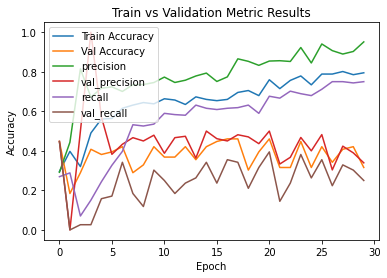

In [143]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history8.history['precision'], label = 'precision')
plt.plot(history8.history['val_precision'], label = 'val_precision')
plt.plot(history8.history['recall'], label = 'recall')
plt.plot(history8.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image 

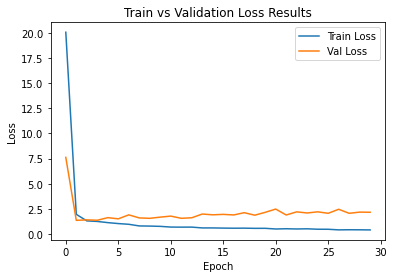

In [144]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [145]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [146]:
test_preds = conv_base.predict(test_data_aug)

In [413]:
model8.evaluate(test_preds)

preds8 = model8.predict(test_preds)
preds8 = np.argmax(preds8, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds8)

3/3 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [296]:
results_df2['test_accuracy'].iloc[8] = 0

results_df2['test_recall'].iloc[8] = 0

results_df2['test_precision'].iloc[8] = 0

#### Confusion Matrix

In [414]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


              effusion  normal  otitis_media  tube
effusion             0       6             0     1
normal               0      15             6    13
otitis_media         0      12             0     4
tube                 0      10             1     8


#### Classification Matrix 

In [415]:
print(classification_report(test_data_values, preds8, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.35      0.44      0.39        34
otitis_media       0.00      0.00      0.00        16
        tube       0.31      0.42      0.36        19

    accuracy                           0.30        76
   macro avg       0.16      0.22      0.19        76
weighted avg       0.23      0.30      0.26        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 9: Adding Prebuilt Networks Xception

In [151]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [152]:
preds9 = conv_base9.predict(train_aug)

In [153]:
preds_test9 = conv_base9.predict(test_data_aug)

In [154]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.3))
model9.add(Dense(4, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [155]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [156]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_test9, y_test_binarized),
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 1s 36ms/step - loss: 1.3359 - accuracy: 0.3718 - recall: 0.1314 - precision: 0.4607 - val_loss: 1.2528 - val_accuracy: 0.4868 - val_recall: 0.0132 - val_precision: 0.3333
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 1.2359 - accuracy: 0.4583 - recall: 0.1859 - precision: 0.5043 - val_loss: 1.2448 - val_accuracy: 0.4737 - val_recall: 0.1053 - val_precision: 0.7273
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1733 - accuracy: 0.4359 - recall: 0.1218 - precision: 0.7600 - val_loss: 1.2765 - val_accuracy: 0.4474 - val_recall: 0.2368 - val_precision: 0.5000
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1042 - accuracy: 0.5096 - recall: 0.3301 - precision: 0.6561 - val_loss: 1.2945 - val_accuracy: 0.4079 - val_recall: 0.1579 - val_precision: 0.5455
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 1.0523 - accuracy: 0.6026 - recall: 

#### Adding Results to DF

In [297]:
results_df2['train_accuracy'].iloc[9] = 0.9936

results_df2['train_recall'].iloc[9] =  0.9872

results_df2['train_precision'].iloc[9] = 0.9935

results_df2['val_accuracy'].iloc[9] = 0.3684

results_df2['val_recall'].iloc[9] = 0.3158

results_df2['val_precision'].iloc[9] = 0.3636 

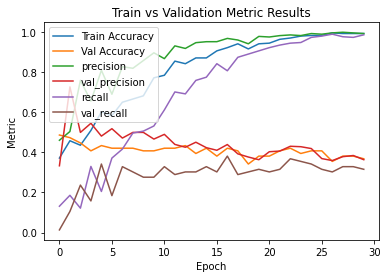

In [158]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history9.history['precision'], label = 'precision')
plt.plot(history9.history['val_precision'], label = 'val_precision')
plt.plot(history9.history['recall'], label = 'recall')
plt.plot(history9.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image

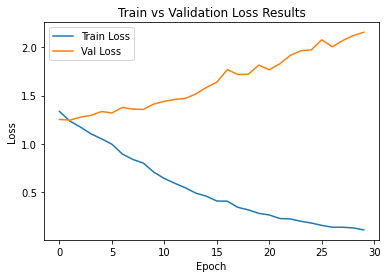

In [159]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [160]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [410]:
preds9_test = conv_base9.predict(test_data_aug)
model9.evaluate(preds9_test)

preds9 = model9.predict(preds9_test)
preds9 = np.argmax(preds9, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds9)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [408]:

results_df2['test_accuracy'].iloc[9] = 0

results_df2['test_recall'].iloc[9] = 0

results_df2['test_precision'].iloc[9] = 0


/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [411]:
print(pd.DataFrame(cm, index =['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       4             2     1
normal               0      26             3     5
otitis_media         0      12             2     2
tube                 0      11             6     2


#### Classification Report

In [164]:
print(classification_report(test_data_values, preds9, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.46      0.62      0.52        34
otitis_media       0.29      0.12      0.17        16
        tube       0.36      0.26      0.30        19

    accuracy                           0.37        76
   macro avg       0.27      0.25      0.25        76
weighted avg       0.35      0.37      0.35        76



## Model 10: Adding Prebuilt Networks VGG16

In [165]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [166]:
preds10 = conv_base10.predict(train_aug)

In [167]:
preds_test10 = conv_base10.predict(test_data_aug)

In [168]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.3))
model10.add(Dense(4, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [169]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [170]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 40, validation_data = (preds_test10, y_test_binarized),
    batch_size = 30)

Epoch 1/40
11/11 [==============================] - 1s 28ms/step - loss: 1.3507 - accuracy: 0.3750 - recall: 0.1538 - precision: 0.4615 - val_loss: 1.3066 - val_accuracy: 0.4474 - val_recall: 0.4342 - val_precision: 0.4400
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 1.3201 - accuracy: 0.4167 - recall: 0.2212 - precision: 0.4726 - val_loss: 1.2488 - val_accuracy: 0.4474 - val_recall: 0.0263 - val_precision: 0.6667
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2746 - accuracy: 0.4167 - recall: 0.0833 - precision: 0.5200 - val_loss: 1.2488 - val_accuracy: 0.4474 - val_recall: 0.1579 - val_precision: 0.6316
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2768 - accuracy: 0.4391 - recall: 0.2051 - precision: 0.4741 - val_loss: 1.2518 - val_accuracy: 0.4474 - val_recall: 0.2105 - val_precision: 0.5000
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2699 - accuracy: 0.4455 - recall: 0.1

#### Adding Results to DF

In [299]:
results_df2['train_accuracy'].iloc[10] =0.4872 

results_df2['train_recall'].iloc[10] = 0.2532

results_df2['train_precision'].iloc[10] = 0.5852

results_df2['val_accuracy'].iloc[10] = 0.4474

results_df2['val_recall'].iloc[10] = 0.1184

results_df2['val_precision'].iloc[10] = 0.4500


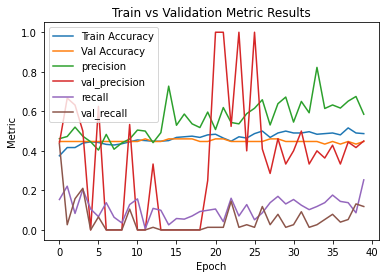

In [172]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history10.history['precision'], label = 'precision')
plt.plot(history10.history['val_precision'], label = 'val_precision')
plt.plot(history10.history['recall'], label = 'recall')
plt.plot(history10.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Not learning much from this model or pretrained network 

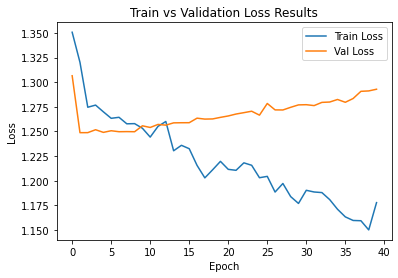

In [173]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [174]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [175]:
preds10_test = conv_base10.predict(test_data_aug)

In [405]:
model10.evaluate(preds10_test)

preds10 = model10.predict(preds10_test)
preds10 = np.argmax(preds10, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds10)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [300]:
results_df2['test_accuracy'].iloc[10] = 0 

results_df2['test_recall'].iloc[10] = 0

results_df2['test_precision'].iloc[10] = 0


#### Confusion Matrix 

In [406]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       6             0     1
normal               0      34             0     0
otitis_media         0      15             0     1
tube                 0      17             1     1


#### Classification Report 

In [407]:
print(classification_report(test_data_values, preds10, target_names = [ 'effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.47      1.00      0.64        34
otitis_media       0.00      0.00      0.00        16
        tube       0.33      0.05      0.09        19

    accuracy                           0.46        76
   macro avg       0.20      0.26      0.18        76
weighted avg       0.29      0.46      0.31        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 11: Adding Prebuilt Networks MobileNetV2

In [180]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

preds11 = conv_base11.predict(train_aug)

preds_test11 = conv_base11.predict(test_data_aug)

model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.3))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(4, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

history11 = model11.fit(preds11, y_train_binarized, epochs = 40, validation_data = (preds_test11, y_test_binarized),
    batch_size = 30)



Epoch 1/40
11/11 [==============================] - 1s 29ms/step - loss: 1.3917 - accuracy: 0.4199 - recall: 0.2083 - precision: 0.4037 - val_loss: 1.3164 - val_accuracy: 0.3816 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 1.2645 - accuracy: 0.4135 - recall: 0.1090 - precision: 0.4658 - val_loss: 1.3103 - val_accuracy: 0.4474 - val_recall: 0.0658 - val_precision: 0.2778
Epoch 3/40
11/11 [==============================] - 0s 6ms/step - loss: 1.2075 - accuracy: 0.4423 - recall: 0.1859 - precision: 0.6042 - val_loss: 1.3124 - val_accuracy: 0.3947 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/40
11/11 [==============================] - 0s 6ms/step - loss: 1.1842 - accuracy: 0.4615 - recall: 0.1667 - precision: 0.5714 - val_loss: 1.3197 - val_accuracy: 0.4474 - val_recall: 0.1447 - val_precision: 0.3793
Epoch 5/40
11/11 [==============================] - 0s 7ms/step - loss: 1.1562 - accuracy: 0.47

#### Adding Results to DF

In [301]:
results_df2['train_accuracy'].iloc[11] =0.9647

results_df2['train_recall'].iloc[11] =  0.9615 

results_df2['train_precision'].iloc[11] = 0.9772 

results_df2['val_accuracy'].iloc[11] = 0.3026

results_df2['val_recall'].iloc[11] = 0.2763

results_df2['val_precision'].iloc[11] =  0.3000

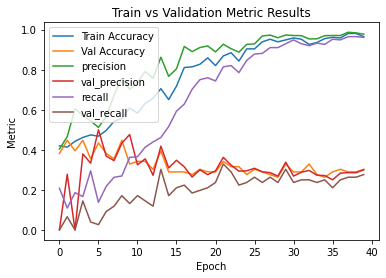

In [182]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history11.history['precision'], label = 'precision')
plt.plot(history11.history['val_precision'], label = 'val_precision')
plt.plot(history11.history['recall'], label = 'recall')
plt.plot(history11.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image

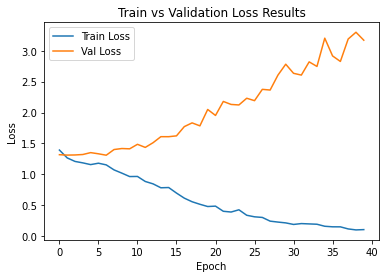

In [183]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [184]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [185]:
preds11_test = conv_base11.predict(test_data_aug)

In [402]:
model11.evaluate(preds11_test)

preds11 = model11.predict(preds11_test)
preds11 = np.argmax(preds11, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds11)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [302]:
results_df2['test_accuracy'].iloc[11] = 0

results_df2['test_recall'].iloc[11] = 0

results_df2['test_precision'].iloc[11] = 0

#### Confusion Matrix

In [403]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube' ], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       3             1     3
normal               3      19             6     6
otitis_media         1       6             4     5
tube                 2      11             0     6


#### Classification Report 

In [404]:
print(classification_report(test_data_values, preds11, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.49      0.56      0.52        34
otitis_media       0.36      0.25      0.30        16
        tube       0.30      0.32      0.31        19

    accuracy                           0.38        76
   macro avg       0.29      0.28      0.28        76
weighted avg       0.37      0.38      0.37        76



## Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)

In [190]:
model12 = Sequential()
model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dropout(0.1))
model12.add(Dense(4, activation = 'softmax'))

model12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [191]:
history12 = model12.fit(train_aug, epochs = 80, validation_data = test_data_aug)

Epoch 1/80
10/10 [==============================] - 10s 1s/step - loss: 25.9133 - accuracy: 0.3429 - recall: 0.3141 - precision: 0.3403 - val_loss: 11.1192 - val_accuracy: 0.1974 - val_recall: 0.1974 - val_precision: 0.1974
Epoch 2/80
10/10 [==============================] - 9s 905ms/step - loss: 6.4364 - accuracy: 0.3910 - recall: 0.3814 - precision: 0.3889 - val_loss: 1.9769 - val_accuracy: 0.4737 - val_recall: 0.4474 - val_precision: 0.5231
Epoch 3/80
10/10 [==============================] - 9s 910ms/step - loss: 2.2278 - accuracy: 0.5513 - recall: 0.5224 - precision: 0.5563 - val_loss: 2.4272 - val_accuracy: 0.3947 - val_recall: 0.3947 - val_precision: 0.3947
Epoch 4/80
10/10 [==============================] - 9s 915ms/step - loss: 1.4667 - accuracy: 0.6186 - recall: 0.5833 - precision: 0.6431 - val_loss: 1.8286 - val_accuracy: 0.3947 - val_recall: 0.3289 - val_precision: 0.4237
Epoch 5/80
10/10 [==============================] - 9s 913ms/step - loss: 1.1650 - accuracy: 0.6218 - re

#### Adding Result to DF

In [303]:
results_df2['train_accuracy'].iloc[12] = 0.9199

results_df2['train_recall'].iloc[12] = 0.9006 

results_df2['train_precision'].iloc[12] = 0.9336

results_df2['val_accuracy'].iloc[12] = 0.7632 

results_df2['val_recall'].iloc[12] = 0.7237

results_df2['val_precision'].iloc[12] =  0.8030

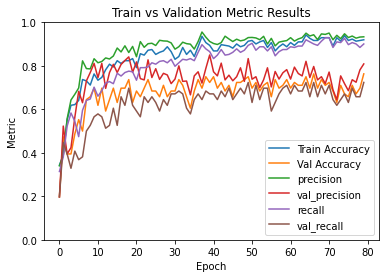

In [193]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.plot(history12.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history12.history['precision'], label = 'precision')
plt.plot(history12.history['val_precision'], label = 'val_precision')
plt.plot(history12.history['recall'], label = 'recall')
plt.plot(history12.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


model still overfit but improving validation metrics 

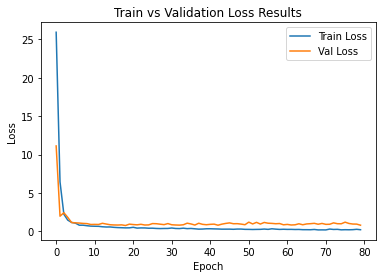

In [194]:
plt.plot(history12.history['loss'], label = 'Train Loss')
plt.plot(history12.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [195]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [396]:
model12.evaluate(test_data_aug)

preds12 = model12.predict(test_data_aug)
preds12 = np.argmax(preds12, axis=1)

test_data_values = test_data_aug.labels 
cm = confusion_matrix(test_data_values, preds12)

3/3 [==============================] - 2s 463ms/step - loss: 0.6776 - accuracy: 0.8289 - recall: 0.7895 - precision: 0.8333


#### Adding Results to DF

In [304]:
results_df2['test_accuracy'].iloc[12] = 0.7500

results_df2['test_recall'].iloc[12] = 0.7105

results_df2['test_precision'].iloc[12] = 0.7714


#### Confusion Matrix

In [397]:
cm = confusion_matrix(test_data_values, preds12)
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion','normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       4             1     0
normal               2      28             2     2
otitis_media         2       2            12     0
tube                 3       1             0    15


#### Classification Report 

In [399]:
print(classification_report(test_data_values, preds12, target_names = [ 'effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.22      0.29      0.25         7
      normal       0.80      0.82      0.81        34
otitis_media       0.80      0.75      0.77        16
        tube       0.88      0.79      0.83        19

    accuracy                           0.75        76
   macro avg       0.68      0.66      0.67        76
weighted avg       0.77      0.75      0.76        76



## Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)

In [200]:
model13 = Sequential()
model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(AveragePooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dropout(0.4))
model13.add(Dense(4, activation = 'softmax'))

model13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [201]:
history13 = model13.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 10s 923ms/step - loss: 7.0134 - accuracy: 0.3013 - recall: 0.2724 - precision: 0.3102 - val_loss: 2.1195 - val_accuracy: 0.2368 - val_recall: 0.1184 - val_precision: 0.3462
Epoch 2/60
10/10 [==============================] - 8s 848ms/step - loss: 2.3550 - accuracy: 0.3910 - recall: 0.3462 - precision: 0.3956 - val_loss: 1.6620 - val_accuracy: 0.2895 - val_recall: 0.1579 - val_precision: 0.3333
Epoch 3/60
10/10 [==============================] - 8s 845ms/step - loss: 1.2791 - accuracy: 0.4615 - recall: 0.2372 - precision: 0.5649 - val_loss: 1.2481 - val_accuracy: 0.4605 - val_recall: 0.0921 - val_precision: 0.5385
Epoch 4/60
10/10 [==============================] - 8s 853ms/step - loss: 1.1653 - accuracy: 0.5288 - recall: 0.1891 - precision: 0.7375 - val_loss: 1.1399 - val_accuracy: 0.5263 - val_recall: 0.2763 - val_precision: 0.7500
Epoch 5/60
10/10 [==============================] - 8s 842ms/step - loss: 1.1225 - accuracy: 0.5545 - r

#### Adding Results to DF

In [316]:
results_df2['train_accuracy'].iloc[13] = 0.7788

results_df2['train_recall'].iloc[13] =0.6795

results_df2['train_precision'].iloc[13] =  0.8797

results_df2['val_accuracy'].iloc[13] =  0.5789

results_df2['val_recall'].iloc[13] = 0.4079 

results_df2['val_precision'].iloc[13] =   0.8158

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


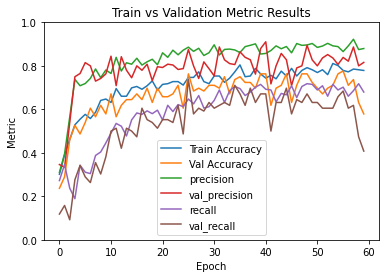

In [203]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history13.history['precision'], label = 'precision')
plt.plot(history13.history['val_precision'], label = 'val_precision')
plt.plot(history13.history['recall'], label = 'recall')
plt.plot(history13.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


not as overfit as other models, validation metrics around .5-.8

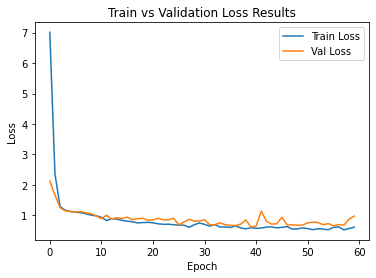

In [204]:
plt.plot(history13.history['loss'], label = 'Train Loss')
plt.plot(history13.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [205]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [394]:
model13.evaluate(test_data_aug)

preds13 = model13.predict(test_data_aug)
preds13 = np.argmax(preds13, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds13)

3/3 [==============================] - 2s 450ms/step - loss: 1.0025 - accuracy: 0.5658 - recall: 0.4079 - precision: 0.8158


#### Adding Results to DF

In [317]:
results_df2['test_accuracy'].iloc[13] =  0.6184

results_df2['test_recall'].iloc[13] =  0.4342

results_df2['test_precision'].iloc[13] =  0.9167 


#### Confusion Matrix 

In [395]:
print(pd.DataFrame(cm, index = [ 'effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       2             1     2
normal               2      16            16     0
otitis_media         0       0            15     1
tube                 0       1             3    15


#### Classification Report 

In [209]:
print(classification_report(test_data_values, preds13, target_names = ['effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.06      0.29      0.10         7
      normal       0.25      0.03      0.05        34
otitis_media       0.16      0.19      0.17        16
        tube       0.11      0.11      0.11        19

    accuracy                           0.11        76
   macro avg       0.14      0.15      0.11        76
weighted avg       0.18      0.11      0.10        76



## Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)

In [210]:
model14 = Sequential()
model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(GlobalAveragePooling2D())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dropout(0.2))
model14.add(Dense(4, activation = 'softmax'))

model14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [211]:
history14 = model14.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 11s 1s/step - loss: 1.3635 - accuracy: 0.3942 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3387 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 9s 925ms/step - loss: 1.3242 - accuracy: 0.4487 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3028 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 8s 850ms/step - loss: 1.2888 - accuracy: 0.4455 - recall: 0.0032 - precision: 0.2000 - val_loss: 1.2770 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/60
10/10 [==============================] - 8s 831ms/step - loss: 1.2737 - accuracy: 0.4455 - recall: 0.0064 - precision: 0.1111 - val_loss: 1.2633 - val_accuracy: 0.4474 - val_recall: 0.0132 - val_precision: 0.1111
Epoch 5/60
10/10 [==============================] - 8s 841ms/step 

#### Adding Results to DF

In [318]:
results_df2['train_accuracy'].iloc[14] =  0.6763 

results_df2['train_recall'].iloc[14] =0.4776

results_df2['train_precision'].iloc[14] =  0.7680 

results_df2['val_accuracy'].iloc[14] =  0.5526

results_df2['val_recall'].iloc[14] = 0.3947

results_df2['val_precision'].iloc[14] =   0.8333


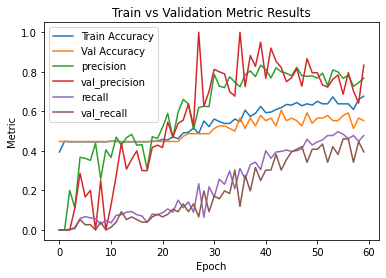

In [213]:
plt.plot(history14.history['accuracy'], label='Train Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history14.history['precision'], label = 'precision')
plt.plot(history14.history['val_precision'], label = 'val_precision')
plt.plot(history14.history['recall'], label = 'recall')
plt.plot(history14.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

slow learing rate 

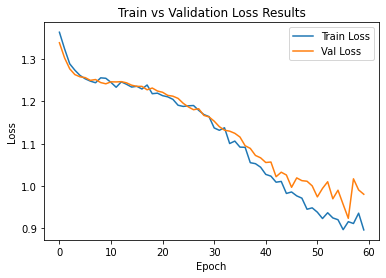

In [214]:
plt.plot(history14.history['loss'], label = 'Train Loss')
plt.plot(history14.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [215]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [391]:
model14.evaluate(test_data_aug)

preds14 = model14.predict(test_data_aug)
preds14 = np.argmax(preds14, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds14)

3/3 [==============================] - 2s 466ms/step - loss: 0.9753 - accuracy: 0.5921 - recall: 0.3684 - precision: 0.7368


#### Adding Results to DF

In [319]:
results_df2['test_accuracy'].iloc[14] = 0.5395 

results_df2['test_recall'].iloc[14] = 0.3816

results_df2['test_precision'].iloc[14] =  0.7838


#### Confusion Matrix

In [392]:
print(pd.DataFrame(cm, index = [ 'effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion',  'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


              effusion  normal  otitis_media  tube
effusion             0       3             3     1
normal               0      28             3     3
otitis_media         0       0             8     8
tube                 0      10             2     7


#### Classification Report 

In [393]:
print(classification_report(test_data_values, preds14, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.68      0.82      0.75        34
otitis_media       0.50      0.50      0.50        16
        tube       0.37      0.37      0.37        19

    accuracy                           0.57        76
   macro avg       0.39      0.42      0.40        76
weighted avg       0.50      0.57      0.53        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)

In [227]:
model15 = Sequential()
model15.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model15.add(GlobalMaxPooling2D())
model15.add(Dense(100, activation = 'relu'))
model15.add(Dropout(0.2))
model15.add(Dense(4, activation = 'softmax'))

model15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [342]:
history15 = model15.fit(train_aug, epochs = 50, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.2044 - accuracy: 0.4968 - recall: 0.1346 - precision: 0.6462 - val_loss: 1.2468 - val_accuracy: 0.3947 - val_recall: 0.1053 - val_precision: 0.6667
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 1.2023 - accuracy: 0.4904 - recall: 0.1506 - precision: 0.7121 - val_loss: 1.2362 - val_accuracy: 0.4211 - val_recall: 0.0132 - val_precision: 0.5000
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 1.1745 - accuracy: 0.5609 - recall: 0.1026 - precision: 0.7273 - val_loss: 1.2525 - val_accuracy: 0.3947 - val_recall: 0.0526 - val_precision: 0.4444
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 1.1893 - accuracy: 0.5481 - recall: 0.1571 - precision: 0.7101 - val_loss: 1.2424 - val_accuracy: 0.3947 - val_recall: 0.1974 - val_precision: 0.6250
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 1.1693 - accuracy: 0.5321 - recall: 0.24

#### Adding Result to DF

In [305]:
results_df2['train_accuracy'].iloc[15] = 0.6655

results_df2['train_recall'].iloc[15] = 0.5089

results_df2['train_precision'].iloc[15] = 0.7409

results_df2['val_accuracy'].iloc[15] =  0.4928

results_df2['val_recall'].iloc[15] = 0.3913

results_df2['val_precision'].iloc[15] =  0.5400

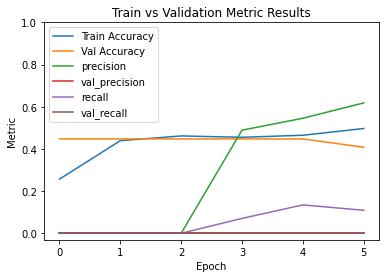

In [306]:
plt.plot(history15.history['accuracy'], label='Train Accuracy')
plt.plot(history15.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history15.history['precision'], label = 'precision')
plt.plot(history15.history['val_precision'], label = 'val_precision')
plt.plot(history15.history['recall'], label = 'recall')
plt.plot(history15.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

slow learning rate 

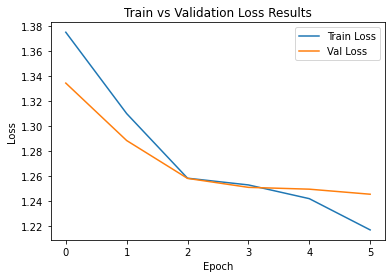

In [307]:
plt.plot(history15.history['loss'], label = 'Train Loss')
plt.plot(history15.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [308]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [388]:
model15.evaluate(test_data_aug)

preds15 = model15.predict(test_data_aug)
preds15 = np.argmax(preds15, axis = 1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds15)

3/3 [==============================] - 2s 430ms/step - loss: 1.6303 - accuracy: 0.4868 - recall: 0.3947 - precision: 0.5556


#### Adding Results to DF

In [310]:
results_df2['test_accuracy'].iloc[15] = 0.4638

results_df2['test_recall'].iloc[15] = 0.4203

results_df2['test_precision'].iloc[15] = 0.5088


/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [389]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       3             1     3
normal               0      24             0    10
otitis_media         0       4             7     5
tube                 0      10             1     8


#### Classification Report 

In [390]:
print(classification_report(test_data_values, preds15, target_names = [ 'effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.59      0.71      0.64        34
otitis_media       0.78      0.44      0.56        16
        tube       0.31      0.42      0.36        19

    accuracy                           0.51        76
   macro avg       0.42      0.39      0.39        76
weighted avg       0.50      0.51      0.49        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 16: Maxpool,Conv2D, with Less Neurons

In [335]:
model16 = Sequential()
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(MaxPool2D((2, 2)))
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(Flatten())
model16.add(Dense(100, activation = 'relu'))
model16.add(Dropout(0.2))
model16.add(Dense(4, activation = 'softmax'))

model16.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [336]:
history16 = model16.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 15s 1s/step - loss: 7.4875 - accuracy: 0.3013 - recall: 0.2692 - precision: 0.3088 - val_loss: 1.9511 - val_accuracy: 0.2237 - val_recall: 0.0658 - val_precision: 0.1852
Epoch 2/60
10/10 [==============================] - 9s 934ms/step - loss: 1.4479 - accuracy: 0.3910 - recall: 0.0609 - precision: 0.3585 - val_loss: 1.2497 - val_accuracy: 0.2895 - val_recall: 0.0658 - val_precision: 0.5556
Epoch 3/60
10/10 [==============================] - 11s 1s/step - loss: 1.2147 - accuracy: 0.4455 - recall: 0.1442 - precision: 0.5488 - val_loss: 1.1649 - val_accuracy: 0.5132 - val_recall: 0.3684 - val_precision: 0.5833
Epoch 4/60
10/10 [==============================] - 10s 1s/step - loss: 1.1357 - accuracy: 0.5769 - recall: 0.3045 - precision: 0.7308 - val_loss: 1.0730 - val_accuracy: 0.5526 - val_recall: 0.3684 - val_precision: 0.6512
Epoch 5/60
10/10 [==============================] - 10s 983ms/step - loss: 1.0490 - accuracy: 0.6186 - recall:

In [ ]:
results_df2['train_accuracy'].iloc[16] = 0.9075

results_df2['train_recall'].iloc[16] = 0.8932

results_df2['train_precision'].iloc[16] = 0.9262 

results_df2['val_accuracy'].iloc[16] = 0.7826 

results_df2['val_recall'].iloc[16] = 0.7536 

results_df2['val_precision'].iloc[16] =  0.8387

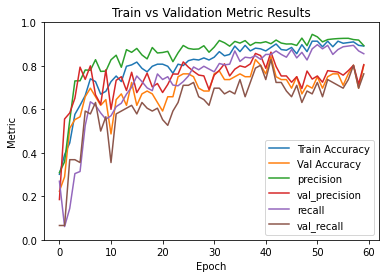

In [337]:
plt.plot(history16.history['accuracy'], label='Train Accuracy')
plt.plot(history16.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history16.history['precision'], label = 'precision')
plt.plot(history16.history['val_precision'], label = 'val_precision')
plt.plot(history16.history['recall'], label = 'recall')
plt.plot(history16.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

not as overfit as some models, improving validation metrics 

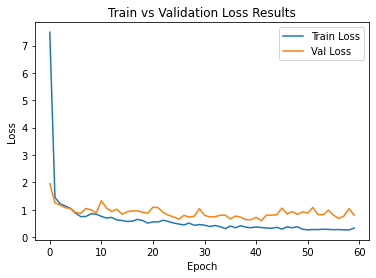

In [338]:
plt.plot(history16.history['loss'], label = 'Train Loss')
plt.plot(history16.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

In [380]:
results = model16.evaluate(test_data_aug)

preds16 = model16.predict(test_data_aug)
preds16 = np.argmax(preds16, axis=1)

test_data_values = test_data_aug.labels 


3/3 [==============================] - 2s 623ms/step - loss: 1.0864 - accuracy: 0.7105 - recall: 0.6842 - precision: 0.7222


In [ ]:

results_df2['test_accuracy'].iloc[16] = 0.8261

results_df2['test_recall'].iloc[16] = 0.7826

results_df2['test_precision'].iloc[16] = 0.8182

In [382]:
cm = confusion_matrix(test_data_values, preds16)
print(pd.DataFrame(cm, index = ['effusion','normal', 'otitis_media', 'tube'], columns = [ 'effusion' ,'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             1       3             2     1
normal               4      27             1     2
otitis_media         0       0            12     4
tube                 1       1             1    16


In [381]:
print(classification_report(test_data_values, preds16, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.17      0.14      0.15         7
      normal       0.87      0.79      0.83        34
otitis_media       0.75      0.75      0.75        16
        tube       0.70      0.84      0.76        19

    accuracy                           0.74        76
   macro avg       0.62      0.63      0.62        76
weighted avg       0.74      0.74      0.73        76



## Model 17: Freezing Inception-ResNetV2

In [ ]:
#reference https://www.youtube.com/watch?v=3ou0KYtDlOI
#Deep Learning with Python by Fracois Chollet

In [ ]:
conv_base17 = InceptionResNetV2(include_top=False, input_shape = (299, 299, 3))

conv_base17.trainable = False

set_trainable = False 

for layer in conv_base17.layers[:90]:
    layer.trainable = False
for layer in conv_base17.layers[90:]:
    layer.trainable = True

conv_base17.summary()

model17= Sequential()
model17.add(conv_base17)
model17.add(GlobalAveragePooling2D())
model17.add(Flatten())
model17.add(Dense(4, activation = 'softmax'))



In [ ]:
model17.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


history = model17.fit(train_aug, epochs = 7, validation_data = test_data_aug, batch_size = 32, callbacks=[early_stop])



In [ ]:
results_df2['train_accuracy'].iloc[17] = 0.9075

results_df2['train_recall'].iloc[17] = 0.8932

results_df2['train_precision'].iloc[17] = 0.9262 

results_df2['val_accuracy'].iloc[17] = 0.7826 

results_df2['val_recall'].iloc[17] = 0.7536 

results_df2['val_precision'].iloc[17] =  0.8387

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

In [ ]:
model17.evaluate(test_data_aug)

preds17 = model17.predict(test_data_aug) > 0.5

preds17 = preds17.astype(int)

test_data_values = test_data_aug.labels 

In [ ]:
results_df2['test_accuracy'].iloc[17] = 0.7826 

results_df2['test_recall'].iloc[17] = 0.7536 

results_df2['test_precision'].iloc[17] =  0.8387

In [ ]:
cm = confusion_matrix(test_data_values, preds17.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion','normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

In [ ]:
print(classification_report(test_data_values, preds17.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

#### Best Model to Date:

### Export Model Summary DF

In [ ]:
results_df2.info()

results_df2 = results_df2.apply(pd.to_numeric)


In [442]:
results_df2.describe()

,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.754459,0.489518,0.404224,0.810818,0.537847,0.451712,0.686424,0.420082,0.365288
std,0.254499,0.182045,0.283313,0.250711,0.214786,0.322064,0.292998,0.202623,0.268382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.660300,0.381600,0.000000,0.754300,0.450000,0.000000,0.508900,0.276300,0.000000
50%,0.794900,0.552600,0.539500,0.901300,0.546700,0.546700,0.750000,0.407900,0.434200
75%,0.964700,0.578900,0.605300,0.977200,0.633800,0.633800,0.961500,0.539500,0.539500
max,1.000000,0.763200,0.750000,1.000000,0.833300,0.916700,1.000000,0.750000,0.750000


In [444]:
results_df2[:17]

,Model,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
0,baseline,0.8846,0.5526,0.5526,0.9013,0.5467,0.5467,0.8782,0.5395,0.5395
1,model_1,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053
2,model_2,0.9936,0.5658,0.5658,1.0000,0.5616,0.5616,0.9904,0.5395,0.5395
3,model_3,0.5801,0.4737,0.4737,0.5820,0.4800,0.4800,0.5801,0.4737,0.4737
4,model_4,0.6603,0.5658,0.5658,0.7706,0.6129,0.6129,0.5385,0.5000,0.5000
5,model_5,0.6186,0.3816,0.3816,0.7543,0.4878,0.4878,0.4231,0.2632,0.2632
6,model_6,0.8205,0.6053,0.6053,0.9593,0.6338,0.6338,0.7564,0.5921,0.5921
7,model_7,0.9872,0.7500,0.7500,0.9871,0.7703,0.7703,0.9840,0.7500,0.7500
8,model_8,0.7949,0.3158,0.0000,0.9512,0.3393,0.0000,0.7500,0.2500,0.0000
9,model_9,0.9936,0.3684,0.0000,0.9935,0.3636,0.0000,0.9872,0.3158,0.0000


In [443]:
results_df2.to_csv('../data/results_df2.csv')

## Exploring Individual Image Predictions 

In [ ]:
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


#test_data = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

#preds = model12.predict(test_data) >.5

#np.argmax(preds.astype(int), axis = 0)

#test_data_values = test_data.labels 

#test_data_values

#x_test_binarized = to_categorical(test_data_values)

#model7.evaluate()

#path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/02_tube_test/AM85R.jpg"

#test = image.load_img(path, target_size=(256, 256))
#test

#model12.predict(np.asarray(test).reshape(1, 256, 256, 3))